Sarah Burg
<br>
Machine Learning
<br>
CS379
<br>
Due date: 4/25/2023
<br>
Unit 3 - Individual Project



---


Supervised machine learning algorithm - Random forest
<br>
<br>
I chose random forest for this algorithm because it is used often in the real world with companies detecting fraud.



---


Description:
<br>
<br>
This dataset contains results from credit fraud.
<br>
<br>
This program will predict credit fraud from the given dataset.



---


References:

*Weka ARFF to CSV.* Retrieved from https://pulipulichen.github.io/jieba-js/weka/arff2csv/

Leonardo Ferreira. (N.D.). *Predicting Credit Risk - Model Pipeline.* Retrieved from https://www.kaggle.com/code/kabure/predicting-credit-risk-model-pipeline/notebook

Sharmila Polamuri. (Sep 23, 2020). *Credit Card Fraud Detection with Classification Algorithms in Python.* Retrieved from https://dataaspirant.com/credit-card-fraud-detection-classification-algorithms-python/#:~:text=The%20decision%20tree%20is%20the,up%20with%20the%20important%20features

Randerson112358. (Jul 22, 2019). *Titanic Survival Prediction Using Machine Learning.* Retrieved from https://betterprogramming.pub/titanic-survival-prediction-using-machine-learning-4c5ff1e3fa16

Pandas. (Apr 03, 2023). *Pandas documentation.* Retrieved from https://pandas.pydata.org/docs/

NumPy. (N.D.). *What is NumPy?* Retrieved from https://numpy.org/doc/stable/user/whatisnumpy.html

ActiveState. (Jul 12, 2022). *What is Matplotlib In Python?* Retrieved from https://www.activestate.com/resources/quick-reads/what-is-matplotlib-in-python-how-to-use-it-for-plotting/

GeeksforGeeks. (Jun 03, 2020). *Introduction to Seaborn - Python.* Retrieved from https://www.geeksforgeeks.org/introduction-to-seaborn-python/

Scikit-learn. (N.D.). *Preprocessing and Normalization.* Retrieved from https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

Scikit-learn. (N.D.). *1.11.2. Forests of randomized trees.* Retrieved from https://scikit-learn.org/stable/modules/ensemble.html#ensemble-methods

Scikit-learn. (N.D.). *Classification metrics.* Retrieved from https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

Scikit-learn. (N.D.). *confusion_matrix.* Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn-metrics-confusion-matrix

Scikit-learn. (N.D.). *classification_report.* Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn-metrics-classification-report

## Importing libraries needed for this program

In [1]:
# Pandas is used for data manipulation and analysis
import pandas as pd

# NumPy is used for working with multidimensional array objects
import numpy as np

# Matplotlib is a plotting library for creating static, animated, 
# and interactive visualizations in Python
import matplotlib.pyplot as plt # Pyplot is a MATLAB-styled interface

# Seaborn is used for data visualization
import seaborn as sns

# This will allow me to change data types
from sklearn.preprocessing import LabelEncoder

# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Splits arrays and matrices into random train and test subsets
from sklearn.model_selection import train_test_split

# This will import random forest algorithm
from sklearn.ensemble import RandomForestClassifier

# Evaluates the accuracy of a classification
from sklearn.metrics import confusion_matrix

# Builds a text report showing the main classification metrics
from sklearn.metrics import classification_report

# Loading dataset

In [2]:
# This dataset was a arff and I converted it to a csv.
# I then uploaded it to my github so it would load into google colab

data = pd.read_csv('https://raw.githubusercontent.com/sarahnicoleburg/credit_card_fraud_data/main/csv_result-credit_fraud.csv')

## Analysing Data

In [3]:
# Displaying some information about the data because I want to know what I am working with

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      1000 non-null   int64 
 1   over_draft              1000 non-null   object
 2   credit_usage            1000 non-null   int64 
 3   credit_history          1000 non-null   object
 4   purpose                 1000 non-null   object
 5   current_balance         1000 non-null   int64 
 6   Average_Credit_Balance  1000 non-null   object
 7   employment              1000 non-null   object
 8   location                1000 non-null   int64 
 9   personal_status         1000 non-null   object
 10  other_parties           1000 non-null   object
 11  residence_since         1000 non-null   int64 
 12  property_magnitude      1000 non-null   object
 13  cc_age                  1000 non-null   int64 
 14  other_payment_plans     1000 non-null   object
 15  housi

In [4]:
# Getting a good look at the data to understand it better so I can figure out what my target variable is

print(data.nunique())
print()
print(data.head())

id                        1000
over_draft                   4
credit_usage                33
credit_history               5
purpose                     10
current_balance            921
Average_Credit_Balance       5
employment                   5
location                     4
personal_status              4
other_parties                3
residence_since              4
property_magnitude           4
cc_age                      53
other_payment_plans          3
housing                      3
existing_credits             4
job                          4
num_dependents               2
own_telephone                2
foreign_worker               2
class                        2
dtype: int64

   id   over_draft  credit_usage                  credit_history  \
0   1           <0             6  critical/other existing credit   
1   2     0<=X<200            48                   existing paid   
2   3  no checking            12  critical/other existing credit   
3   4           <0            42

From the information above, I am getting an idea that the class column with good and bad values are the ones that had fraud or non-fraud

In [5]:
# Checking to see how many rows and columns because I would like to know the size of this dataset

print(data.shape)

(1000, 22)


In [6]:
# Class is my target variable, I want to check the unique values to know what is labeled fraud and non-fraud
# fraud = bad and non-fraud = good

print(data['class'].unique)

<bound method Series.unique of 0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: class, Length: 1000, dtype: object>


In [7]:
# Getting a count of the number of good and bad transactions

data['class'].value_counts()

good    700
bad     300
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

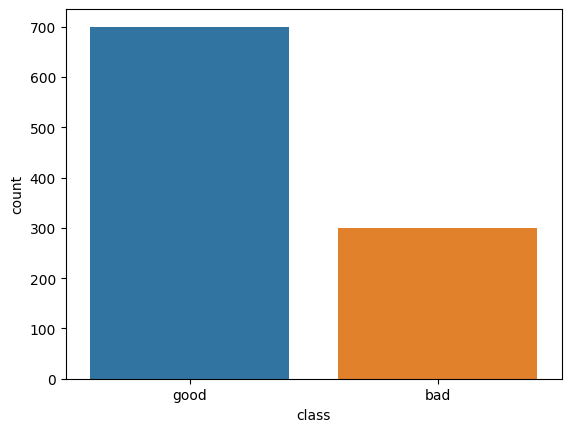

In [8]:
# Visualization of the count of good and bad transactions because visuals help me see the differences better

sns.countplot(x = data['class'])

In [9]:
# Looking at the data types to see if I need to change anything before 
# I continue because I will get errors if I dont change objects to integers

print(data.dtypes)

id                         int64
over_draft                object
credit_usage               int64
credit_history            object
purpose                   object
current_balance            int64
Average_Credit_Balance    object
employment                object
location                   int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
cc_age                     int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object




---


## To continue on understanding the data, I need to change the data types. This will also make the data useable by the algorithm I implement

In [10]:
# Label encoder allows me to change datatypes and I need to do that because I have alot of objects

labelencoder = LabelEncoder()

In [11]:
# Changing over_draft to a numerical value

data.iloc[:, 1]=labelencoder.fit_transform(data.iloc[:, 1].values)

<ipython-input-11-4539ef4a29ee>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 1]=labelencoder.fit_transform(data.iloc[:, 1].values)


In [12]:
# Changing credit_history to a numerical value

data.iloc[:, 3]=labelencoder.fit_transform(data.iloc[:, 3].values)

<ipython-input-12-dce7eebba408>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 3]=labelencoder.fit_transform(data.iloc[:, 3].values)


In [13]:
# Changing purpose to a numerical value

data.iloc[:, 4]=labelencoder.fit_transform(data.iloc[:, 4].values)

<ipython-input-13-87feed27ecba>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 4]=labelencoder.fit_transform(data.iloc[:, 4].values)


In [14]:
# Changing Average_Credit_Blance to a numerical value

data.iloc[:, 6]=labelencoder.fit_transform(data.iloc[:, 6].values)

<ipython-input-14-e9cfbe6979a2>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 6]=labelencoder.fit_transform(data.iloc[:, 6].values)


In [15]:
# Changing employment to a numerical value

data.iloc[:, 7]=labelencoder.fit_transform(data.iloc[:, 7].values)

<ipython-input-15-90bdc1f73056>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 7]=labelencoder.fit_transform(data.iloc[:, 7].values)


In [16]:
# Changing personal_status to a numerical value

data.iloc[:, 9]=labelencoder.fit_transform(data.iloc[:, 9].values)

<ipython-input-16-354d94d1c719>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 9]=labelencoder.fit_transform(data.iloc[:, 9].values)


In [17]:
# Changing other_parties to a numerical value

data.iloc[:, 10]=labelencoder.fit_transform(data.iloc[:, 10].values)

<ipython-input-17-28dce2fc03a9>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 10]=labelencoder.fit_transform(data.iloc[:, 10].values)


In [18]:
# Changing property_magnitude to a numerical value

data.iloc[:, 12]=labelencoder.fit_transform(data.iloc[:, 12].values)

<ipython-input-18-fba85febc4cc>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 12]=labelencoder.fit_transform(data.iloc[:, 12].values)


In [19]:
# Changing other_payment_plans to a numerical value

data.iloc[:, 14]=labelencoder.fit_transform(data.iloc[:, 14].values)

<ipython-input-19-dfaeeaafa314>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 14]=labelencoder.fit_transform(data.iloc[:, 14].values)


In [20]:
# Changing housing to a numerical value

data.iloc[:, 15]=labelencoder.fit_transform(data.iloc[:, 15].values)

<ipython-input-20-62ef41aaf6fe>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 15]=labelencoder.fit_transform(data.iloc[:, 15].values)


In [21]:
# Changing job to a numerical value

data.iloc[:, 17]=labelencoder.fit_transform(data.iloc[:, 17].values)

<ipython-input-21-2155b7a28e0f>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 17]=labelencoder.fit_transform(data.iloc[:, 17].values)


In [22]:
# Changing own_telephone to a numerical value

data.iloc[:, 19]=labelencoder.fit_transform(data.iloc[:, 19].values)

<ipython-input-22-9f7d9b5cb38b>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 19]=labelencoder.fit_transform(data.iloc[:, 19].values)


In [23]:
# Changing foreign_worker to a numerical value

data.iloc[:, 20]=labelencoder.fit_transform(data.iloc[:, 20].values)

<ipython-input-23-097c289e00d8>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 20]=labelencoder.fit_transform(data.iloc[:, 20].values)


In [24]:
# Changing class to a numerical value

data.iloc[:, 21]=labelencoder.fit_transform(data.iloc[:, 21].values)

<ipython-input-24-fdd7551c7e39>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 21]=labelencoder.fit_transform(data.iloc[:, 21].values)


In [25]:
# Checking data types again to see if everything is a numerical value now

print(data.dtypes)

id                        int64
over_draft                int64
credit_usage              int64
credit_history            int64
purpose                   int64
current_balance           int64
Average_Credit_Balance    int64
employment                int64
location                  int64
personal_status           int64
other_parties             int64
residence_since           int64
property_magnitude        int64
cc_age                    int64
other_payment_plans       int64
housing                   int64
existing_credits          int64
job                       int64
num_dependents            int64
own_telephone             int64
foreign_worker            int64
class                     int64
dtype: object


Continuing to analyze the data now that everything is numerical.
I want to check empty values and null values because it can cause issues with the machine learning algorithm if they are present.

In [26]:
# Checking for any empty values

data.isna().sum()

id                        0
over_draft                0
credit_usage              0
credit_history            0
purpose                   0
current_balance           0
Average_Credit_Balance    0
employment                0
location                  0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
cc_age                    0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [27]:
# Checking for any null values

data.isnull().sum()

id                        0
over_draft                0
credit_usage              0
credit_history            0
purpose                   0
current_balance           0
Average_Credit_Balance    0
employment                0
location                  0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
cc_age                    0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [28]:
# Checking for the unique values again for class to know what is fraud and non-fraud
# fraud(bad) will be 0 and non-fraud(good) will be 1

print(data['class'].unique)

<bound method Series.unique of 0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: class, Length: 1000, dtype: int64>


In [29]:
# Checking to see the number of good and bad transactions again now that they are numerical

print(data['class'].value_counts())

1    700
0    300
Name: class, dtype: int64


In [30]:
# Getting a description of the data out of curiousity since I changed everything to numerical

print(data.describe())

                id   over_draft  credit_usage  credit_history      purpose  \
count  1000.000000  1000.000000   1000.000000     1000.000000  1000.000000   
mean    500.500000     1.582000     20.903000        2.219000     4.484000   
std     288.819436     1.253334     12.058814        1.064035     2.421075   
min       1.000000     0.000000      4.000000        0.000000     0.000000   
25%     250.750000     0.000000     12.000000        1.000000     3.000000   
50%     500.500000     1.000000     18.000000        3.000000     4.000000   
75%     750.250000     3.000000     24.000000        3.000000     6.000000   
max    1000.000000     3.000000     72.000000        4.000000     9.000000   

       current_balance  Average_Credit_Balance   employment     location  \
count      1000.000000               1000.0000  1000.000000  1000.000000   
mean       3271.258000                  2.1450     1.525000     2.973000   
std        2822.736876                  1.1114     1.344315     1.118

## Going to be looking at the correlation of the data

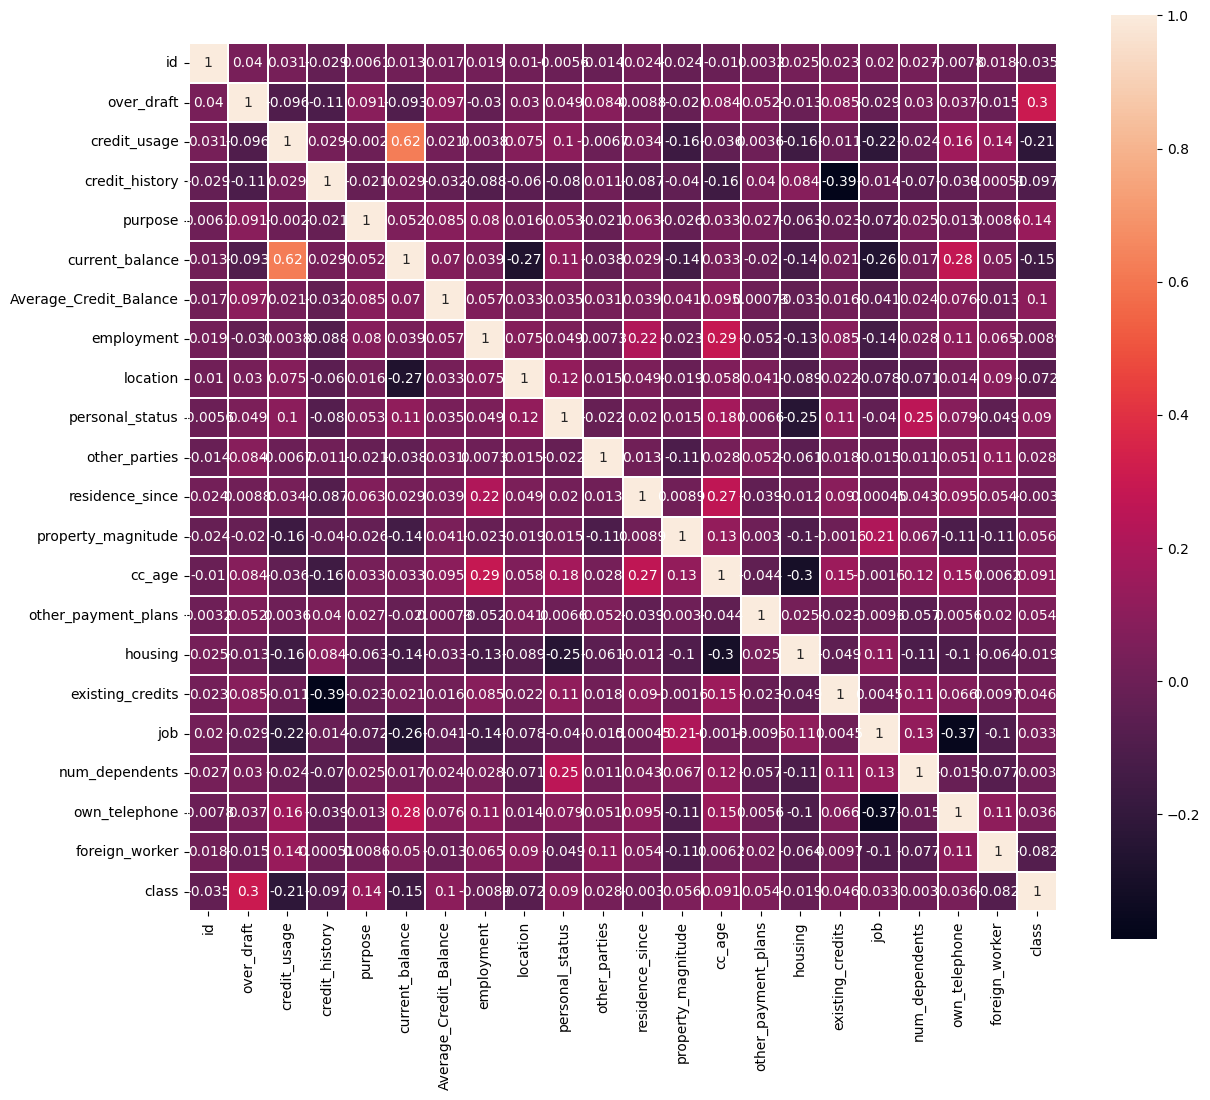

In [31]:
# I am checking correlation because I want to know the mutual associations with the variables

plt.figure(figsize=(14,12))
sns.heatmap(data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square = True,  linecolor = 'white', annot = True)
plt.show()

## Training machine learning model

In [32]:
# I will be removing class from columns because I do not want it to be a property

X = data.drop(['class'], axis=1)

In [33]:
# Making sure class was removed

X

,id,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,...,residence_since,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,1,1,6,1,6,1169,4,3,4,3,...,4,3,67,1,1,2,1,1,1,1
1,2,0,48,3,6,5951,2,0,2,0,...,2,3,22,1,1,1,1,1,0,1
2,3,3,12,1,2,2096,2,1,2,3,...,3,3,49,1,1,1,3,2,0,1
3,4,1,42,3,3,7882,2,1,2,3,...,4,1,45,1,0,1,1,2,0,1
4,5,1,24,2,4,4870,2,0,3,3,...,4,2,53,1,0,2,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,12,3,3,1736,2,1,3,0,...,4,3,31,1,1,1,3,1,0,1
996,997,1,30,3,9,3857,2,0,4,1,...,4,1,40,1,1,1,0,1,1,1
997,998,3,12,3,6,804,2,3,4,3,...,4,0,38,1,1,1,1,1,0,1
998,999,1,45,3,6,1845,2,0,4,3,...,4,2,23,1,0,1,1,1,1,1


In [34]:
# Making it to where the Y axis only has a class column

Y = data[['class']]

In [35]:
# Making sure class is the only column in Y axis

Y

,class
0,1
1,0
2,1
3,1
4,0
...,...
995,1
996,1
997,1
998,0


In [36]:
# Splitting the dataset into 90% training and 10% testing

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

## Random forest algorithm implementation and results

In [37]:
# Defining prediction with random forest

def random_forest_classifier(X_train, y_train, X_test, y_test):

     # Making object for DecisionTreeClassifier class
     # n_estimators is the number of trees I will be using
     classifier = RandomForestClassifier(n_estimators = 40)   

     # Training the model                    
     classifier.fit(X_train, y_train.values.ravel())

     # Accuracy score
     acc_score = classifier.score(X_test, y_test)

     # Displaying accuracy score results
     print(f'Accuracy of model on test dataset :- {acc_score}')

     # Predict result using test dataset
     y_pred = classifier.predict(X_test)

     # Confusion matrix
     print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred)}")

     # Classification report for f1-score
     print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")

# Calling the random_forest_classifier
random_forest_classifier(X_train, y_train, X_test, y_test)

Accuracy of model on test dataset :- 0.76
Confusion Matrix :- 
 [[11 14]
 [10 65]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.52      0.44      0.48        25
           1       0.82      0.87      0.84        75

    accuracy                           0.76       100
   macro avg       0.67      0.65      0.66       100
weighted avg       0.75      0.76      0.75       100

